In [3]:
from matplotlib import pyplot as plt
plt.style.use('classic')
from sklearn import linear_model
import pandas as pd 
import numpy as np

In [6]:
data = pd.read_csv("Correlation2015.csv")
data.shape
data.head(3)

,4,X,Y,S3 OLCI Chl-a,L8 Chl-a Estimates
0,7/1/2015,34.6883,-0.13600,25.826229,28.672397
1,NaN,34.8431,-0.28705,32.192482,27.782982
2,NaN,34.6333,-0.33787,20.771219,11.716781


In [8]:
# Correlation Co-efficient
data.corr()

,X,Y,S3 OLCI Chl-a,L8 Chl-a Estimates
X,1.000000,0.088590,-0.016511,-0.078669
Y,0.088590,1.000000,-0.030324,0.027432
S3 OLCI Chl-a,-0.016511,-0.030324,1.000000,0.847751
L8 Chl-a Estimates,-0.078669,0.027432,0.847751,1.000000


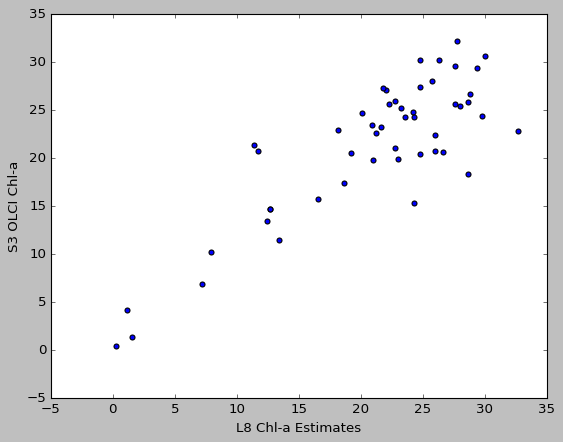

In [7]:

data.plot(kind='scatter', x = "L8 Chl-a Estimates", y="S3 OLCI Chl-a")
plt.show()

In [11]:

# change to df
estimates = pd.DataFrame(data["L8 Chl-a Estimates"])
reference = pd.DataFrame(data["S3 OLCI Chl-a"])

In [12]:
#Build linear model
lm = linear_model.LinearRegression()
model = lm.fit(estimates, reference)

In [13]:
model.coef_

array([[0.79710689]])

In [14]:
model.intercept_

array([4.51198199])

In [15]:
# Model Evaluation
model.score(estimates, reference)

0.7186815964202049

In [17]:
# Predict new value of price
estimatesNew = 56
estimatesNew = np.array(estimatesNew).reshape(1, -1)
estimatesPred = model.predict(estimatesNew)
estimatesPred

C:\Users\okomo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[49.14996786]])

In [21]:
# Predict more values
X = ([672676, 582682])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X, Y], axis = 1, keys = ['estimatesNew', 'estimatesPred'])
df

C:\Users\okomo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,estimatesNew,estimatesPred
,0,0
0,672676,536199.186664
1,582682,464464.349159


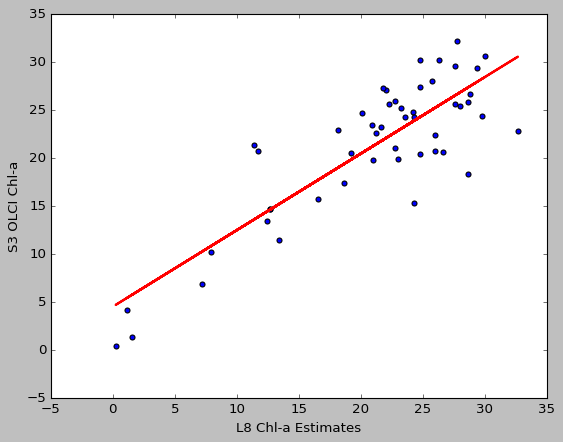

In [24]:
# Visualize the results

data.plot(kind = "scatter", x = 'L8 Chl-a Estimates', y = "S3 OLCI Chl-a")
# Regression line
plt.plot(estimates, model.predict(estimates), color = "red", linewidth = 2)
#plt.legend(loc='best',fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.show()